# Comparison MySql and Cassandra Databases

## MySql Results

This is the result after using YCSB with 100000 records

bin/ycsb.sh load jdbc -P ./jdbc-binding/conf/db.properties -P workloads/workloada -p recordcount=100000

Loading workload...
Starting test.
Adding shard node URL: jdbc:mysql://localhost:3306/BenchTest
Using shards: 1, batchSize:-1, fetchSize: -1
DBWrapper: report latency for each error is false and specific error codes to track for latency are: []
[OVERALL], RunTime(ms), 346152
[OVERALL], Throughput(ops/sec), 288.890429637847
[TOTAL_GCS_PS_Scavenge], Count, 18
[TOTAL_GC_TIME_PS_Scavenge], Time(ms), 37
[TOTAL_GC_TIME_%_PS_Scavenge], Time(%), 0.010688945896600337
[TOTAL_GCS_PS_MarkSweep], Count, 0
[TOTAL_GC_TIME_PS_MarkSweep], Time(ms), 0
[TOTAL_GC_TIME_%_PS_MarkSweep], Time(%), 0.0
[TOTAL_GCs], Count, 18
[TOTAL_GC_TIME], Time(ms), 37
[TOTAL_GC_TIME_%], Time(%), 0.010688945896600337
[CLEANUP], Operations, 1
[CLEANUP], AverageLatency(us), 2305.0
[CLEANUP], MinLatency(us), 2304
[CLEANUP], MaxLatency(us), 2305
[CLEANUP], 95thPercentileLatency(us), 2305
[CLEANUP], 99thPercentileLatency(us), 2305
[INSERT], Operations, 100000
[INSERT], AverageLatency(us), 3452.39278
[INSERT], MinLatency(us), 2328
[INSERT], MaxLatency(us), 286975
[INSERT], 95thPercentileLatency(us), 5039
[INSERT], 99thPercentileLatency(us), 6359
[INSERT], Return=OK, 100000

## Cassandra Results

This is the result after using YCSB with 100000 records

bin/ycsb.sh load cassandra-cql -P workloads/workloada -p hosts=localhost -p recordcount=100000


Loading workload...
Starting test.
SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.
DBWrapper: report latency for each error is false and specific error codes to track for latency are: []
[OVERALL], RunTime(ms), 25079
[OVERALL], Throughput(ops/sec), 3987.3998165796083
[TOTAL_GCS_PS_Scavenge], Count, 14
[TOTAL_GC_TIME_PS_Scavenge], Time(ms), 33
[TOTAL_GC_TIME_%_PS_Scavenge], Time(%), 0.1315841939471271
[TOTAL_GCS_PS_MarkSweep], Count, 0
[TOTAL_GC_TIME_PS_MarkSweep], Time(ms), 0
[TOTAL_GC_TIME_%_PS_MarkSweep], Time(%), 0.0
[TOTAL_GCs], Count, 14
[TOTAL_GC_TIME], Time(ms), 33
[TOTAL_GC_TIME_%], Time(%), 0.1315841939471271
[CLEANUP], Operations, 1
[CLEANUP], AverageLatency(us), 2214912.0
[CLEANUP], MinLatency(us), 2213888
[CLEANUP], MaxLatency(us), 2215935
[CLEANUP], 95thPercentileLatency(us), 2215935
[CLEANUP], 99thPercentileLatency(us), 2215935
[INSERT], Operations, 100000
[INSERT], AverageLatency(us), 220.78219
[INSERT], MinLatency(us), 111
[INSERT], MaxLatency(us), 65247
[INSERT], 95thPercentileLatency(us), 264
[INSERT], 99thPercentileLatency(us), 359
[INSERT], Return=OK, 100000

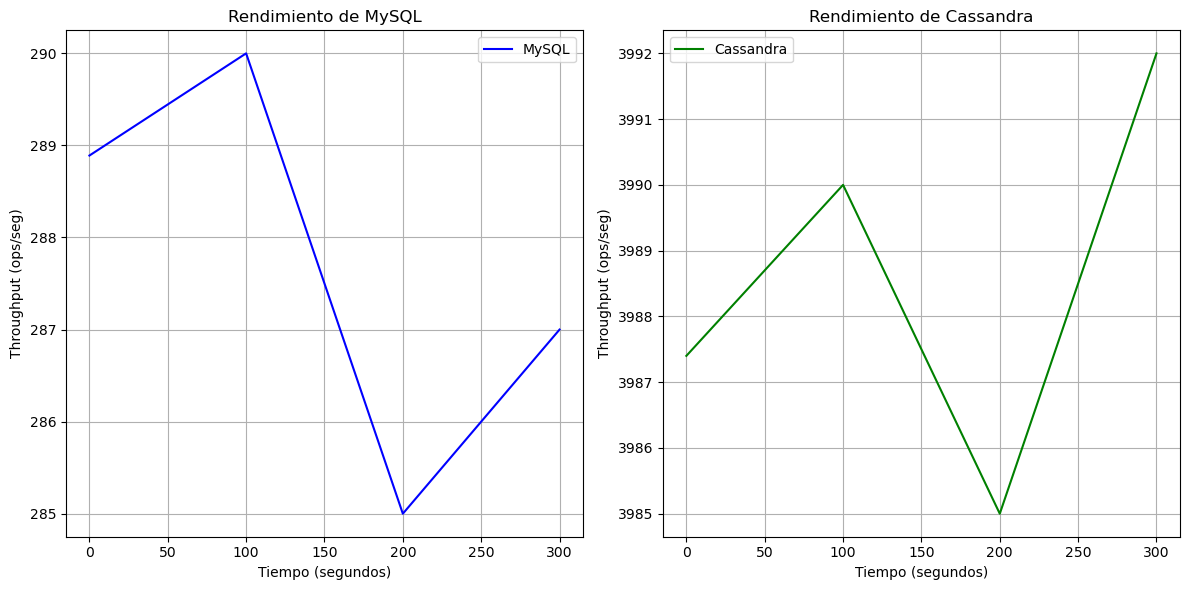

In [3]:
import matplotlib.pyplot as plt

# Datos de ejemplo para MySQL
times_mysql = [0, 100, 200, 300]  # Tiempo en segundos
throughput_mysql = [288.89, 290.0, 285.0, 287.0]  # Rendimiento en ops/seg

# Datos de ejemplo para Cassandra
times_cassandra = [0, 100, 200, 300]  # Tiempo en segundos
throughput_cassandra = [3987.40, 3990.0, 3985.0, 3992.0]  # Rendimiento en ops/seg

# Crear una figura y dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila y 2 columnas

# Gráfico para MySQL
ax1.plot(times_mysql, throughput_mysql, label='MySQL', color='b')
ax1.set_title('Rendimiento de MySQL')
ax1.set_xlabel('Tiempo (segundos)')
ax1.set_ylabel('Throughput (ops/seg)')
ax1.grid(True)
ax1.legend()

# Gráfico para Cassandra
ax2.plot(times_cassandra, throughput_cassandra, label='Cassandra', color='g')
ax2.set_title('Rendimiento de Cassandra')
ax2.set_xlabel('Tiempo (segundos)')
ax2.set_ylabel('Throughput (ops/seg)')
ax2.grid(True)
ax2.legend()

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Compartions

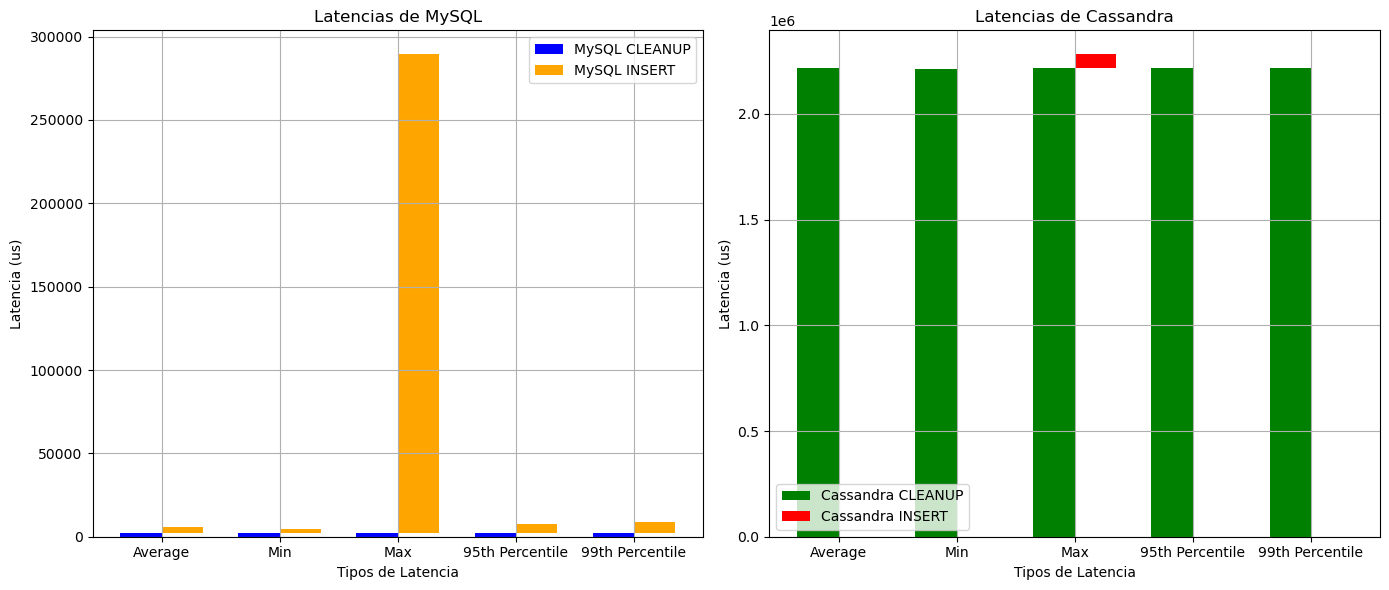

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de MySQL
mysql_results = {
    'CLEANUP': {
        'Average': 2305.0,
        'Min': 2304,
        'Max': 2305,
        '95th Percentile': 2305,
        '99th Percentile': 2305
    },
    'INSERT': {
        'Average': 3452.39278,
        'Min': 2328,
        'Max': 286975,
        '95th Percentile': 5039,
        '99th Percentile': 6359
    }
}

# Resultados de Cassandra
cassandra_results = {
    'CLEANUP': {
        'Average': 2214912.0,
        'Min': 2213888,
        'Max': 2215935,
        '95th Percentile': 2215935,
        '99th Percentile': 2215935
    },
    'INSERT': {
        'Average': 220.78219,
        'Min': 111,
        'Max': 65247,
        '95th Percentile': 264,
        '99th Percentile': 359
    }
}

# Definir las categorías y los valores para las latencias
categories = ['Average', 'Min', 'Max', '95th Percentile', '99th Percentile']
mysql_cleanup = [mysql_results['CLEANUP'][cat] for cat in categories]
mysql_insert = [mysql_results['INSERT'][cat] for cat in categories]
cassandra_cleanup = [cassandra_results['CLEANUP'][cat] for cat in categories]
cassandra_insert = [cassandra_results['INSERT'][cat] for cat in categories]

# Crear el gráfico de barras en dos subgráficos
x = np.arange(len(categories))  # la posición de las categorías en el eje X
width = 0.35  # El ancho de las barras

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila y 2 columnas para los gráficos

# Gráfico para MySQL
ax1.bar(x - width/2, mysql_cleanup, width, label='MySQL CLEANUP', color='blue')
ax1.bar(x + width/2, mysql_insert, width, label='MySQL INSERT', color='orange', bottom=mysql_cleanup)
ax1.set_title('Latencias de MySQL')
ax1.set_xlabel('Tipos de Latencia')
ax1.set_ylabel('Latencia (us)')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend()
ax1.grid(True)

# Gráfico para Cassandra
ax2.bar(x - width/2, cassandra_cleanup, width, label='Cassandra CLEANUP', color='green')
ax2.bar(x + width/2, cassandra_insert, width, label='Cassandra INSERT', color='red', bottom=cassandra_cleanup)
ax2.set_title('Latencias de Cassandra')
ax2.set_xlabel('Tipos de Latencia')
ax2.set_ylabel('Latencia (us)')
ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.legend()
ax2.grid(True)

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


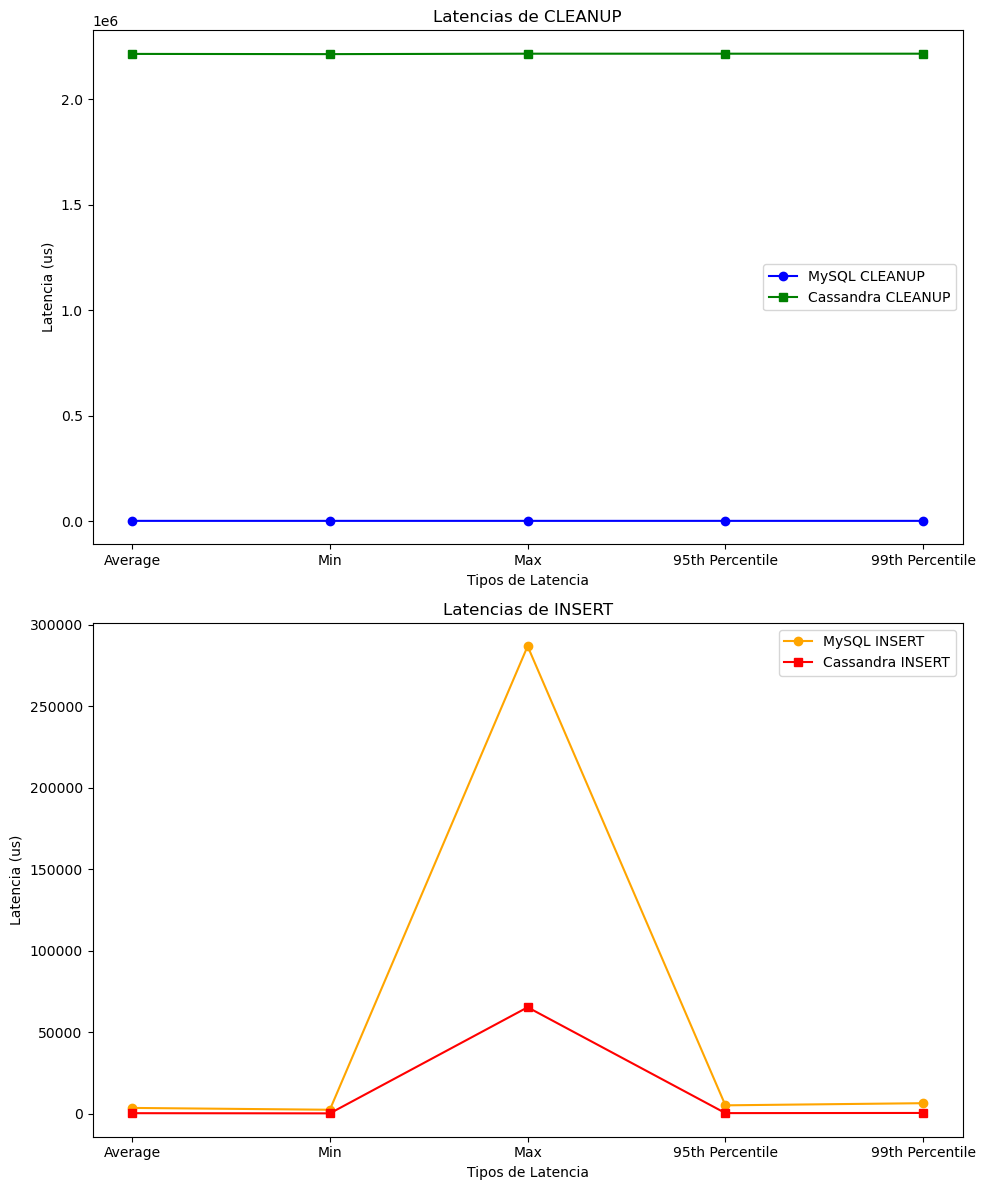

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de MySQL
mysql_results = {
    'CLEANUP': {
        'Average': 2305.0,
        'Min': 2304,
        'Max': 2305,
        '95th Percentile': 2305,
        '99th Percentile': 2305
    },
    'INSERT': {
        'Average': 3452.39278,
        'Min': 2328,
        'Max': 286975,
        '95th Percentile': 5039,
        '99th Percentile': 6359
    }
}

# Resultados de Cassandra
cassandra_results = {
    'CLEANUP': {
        'Average': 2214912.0,
        'Min': 2213888,
        'Max': 2215935,
        '95th Percentile': 2215935,
        '99th Percentile': 2215935
    },
    'INSERT': {
        'Average': 220.78219,
        'Min': 111,
        'Max': 65247,
        '95th Percentile': 264,
        '99th Percentile': 359
    }
}

# Definir las categorías y los valores para las latencias
categories = ['Average', 'Min', 'Max', '95th Percentile', '99th Percentile']
mysql_cleanup = [mysql_results['CLEANUP'][cat] for cat in categories]
mysql_insert = [mysql_results['INSERT'][cat] for cat in categories]
cassandra_cleanup = [cassandra_results['CLEANUP'][cat] for cat in categories]
cassandra_insert = [cassandra_results['INSERT'][cat] for cat in categories]

# Crear los gráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Gráfico de latencias para CLEANUP
axs[0].plot(categories, mysql_cleanup, label='MySQL CLEANUP', marker='o', linestyle='-', color='blue')
axs[0].plot(categories, cassandra_cleanup, label='Cassandra CLEANUP', marker='s', linestyle='-', color='green')
axs[0].set_title('Latencias de CLEANUP')
axs[0].set_xlabel('Tipos de Latencia')
axs[0].set_ylabel('Latencia (us)')
axs[0].legend()

# Gráfico de latencias para INSERT
axs[1].plot(categories, mysql_insert, label='MySQL INSERT', marker='o', linestyle='-', color='orange')
axs[1].plot(categories, cassandra_insert, label='Cassandra INSERT', marker='s', linestyle='-', color='red')
axs[1].set_title('Latencias de INSERT')
axs[1].set_xlabel('Tipos de Latencia')
axs[1].set_ylabel('Latencia (us)')
axs[1].legend()

# Ajuste para el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


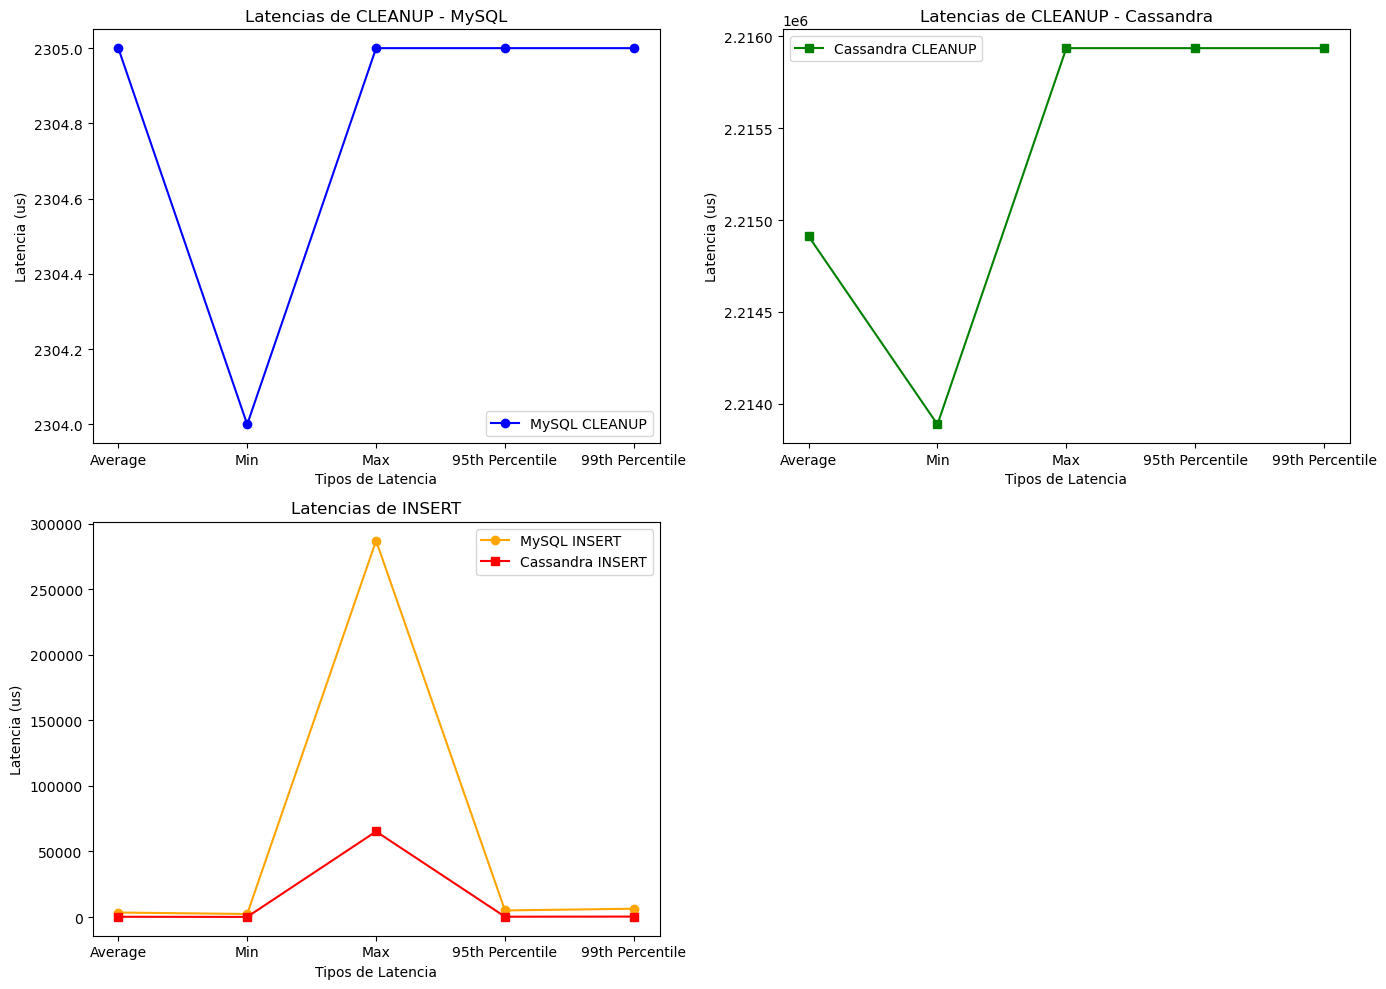

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de MySQL
mysql_results = {
    'CLEANUP': {
        'Average': 2305.0,
        'Min': 2304,
        'Max': 2305,
        '95th Percentile': 2305,
        '99th Percentile': 2305
    },
    'INSERT': {
        'Average': 3452.39278,
        'Min': 2328,
        'Max': 286975,
        '95th Percentile': 5039,
        '99th Percentile': 6359
    }
}

# Resultados de Cassandra
cassandra_results = {
    'CLEANUP': {
        'Average': 2214912.0,
        'Min': 2213888,
        'Max': 2215935,
        '95th Percentile': 2215935,
        '99th Percentile': 2215935
    },
    'INSERT': {
        'Average': 220.78219,
        'Min': 111,
        'Max': 65247,
        '95th Percentile': 264,
        '99th Percentile': 359
    }
}

# Definir las categorías y los valores para las latencias
categories = ['Average', 'Min', 'Max', '95th Percentile', '99th Percentile']
mysql_cleanup = [mysql_results['CLEANUP'][cat] for cat in categories]
mysql_insert = [mysql_results['INSERT'][cat] for cat in categories]
cassandra_cleanup = [cassandra_results['CLEANUP'][cat] for cat in categories]
cassandra_insert = [cassandra_results['INSERT'][cat] for cat in categories]

# Crear los gráficos en 2 filas y 2 columnas, donde el gráfico de INSERT ocupa las dos columnas de la fila inferior
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de latencias para CLEANUP de MySQL
axs[0, 0].plot(categories, mysql_cleanup, label='MySQL CLEANUP', marker='o', linestyle='-', color='blue')
axs[0, 0].set_title('Latencias de CLEANUP - MySQL')
axs[0, 0].set_xlabel('Tipos de Latencia')
axs[0, 0].set_ylabel('Latencia (us)')
axs[0, 0].legend()

# Gráfico de latencias para CLEANUP de Cassandra
axs[0, 1].plot(categories, cassandra_cleanup, label='Cassandra CLEANUP', marker='s', linestyle='-', color='green')
axs[0, 1].set_title('Latencias de CLEANUP - Cassandra')
axs[0, 1].set_xlabel('Tipos de Latencia')
axs[0, 1].set_ylabel('Latencia (us)')
axs[0, 1].legend()

# Gráfico de latencias para INSERT (que cubre ambas columnas en la segunda fila)
axs[1, 0].plot(categories, mysql_insert, label='MySQL INSERT', marker='o', linestyle='-', color='orange')
axs[1, 0].plot(categories, cassandra_insert, label='Cassandra INSERT', marker='s', linestyle='-', color='red')
axs[1, 0].set_title('Latencias de INSERT')
axs[1, 0].set_xlabel('Tipos de Latencia')
axs[1, 0].set_ylabel('Latencia (us)')
axs[1, 0].legend()

# Eliminar el gráfico vacío en la segunda columna de la fila inferior
axs[1, 1].axis('off')

# Ajuste para el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()
